## netCDF y Basemaps

In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ncfile = netCDF4.Dataset('data/standard_atmosphere.nc')  # Open file

temperature = ncfile.variables["temperature"]   # Get Variable object for "temperature"

print(type(temperature))

temp_data = temperature[:]          # Extract NumPy data array from Variable

print(type(temp_data))
print(temperature.ncattrs())      # List all variable attributes
temperature.units                # Units attribute

<class 'netCDF4._netCDF4.Variable'>
<class 'numpy.ndarray'>
['units']


'K'

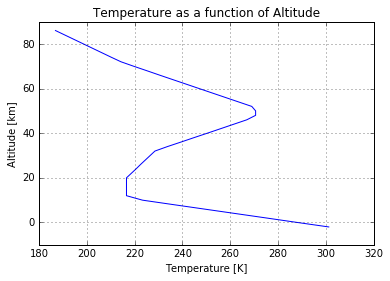

In [3]:
alt = ncfile.variables['altitude']
temp = ncfile.variables['temperature']
plt.plot(temp, alt)
plt.grid()
plt.title("Temperature as a function of Altitude")
plt.ylabel("Altitude [" + alt.units + "]")
plt.xlabel("Temperature [" + temp.units + "]")
plt.show()

ncfile.close()

In [4]:
ncfile = netCDF4.Dataset('data/air.mon.ltm.nc')  # Open file
air_temp = ncfile.variables["air"]   # Get Variable object for "air"

print(type(air_temp))

temp_data = air_temp[:]       # Extract NumPy data array from Variable

print(type(temp_data))
print(air_temp.ncattrs())     # List all variable attributes

air_temp.units               # Units attribute

<class 'netCDF4._netCDF4.Variable'>
<class 'numpy.ndarray'>
['long_name', 'actual_range', 'units', 'add_offset', 'scale_factor', 'missing_value', 'precision', 'least_significant_digit', 'var_desc', 'dataset', 'level_desc', 'statistic', 'parent_stat']


'degC'

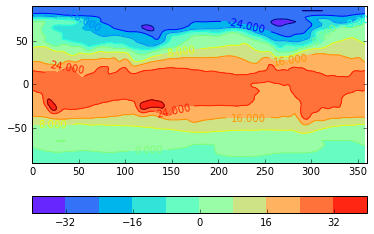

In [5]:
ncf = netCDF4.Dataset("data/air.mon.ltm.nc", "r")
lon = ncf.variables["lon"][:]
lat = ncf.variables["lat"][:]
temp_data = ncf.variables["air"][0,0,:,:]
temp_data.shape

plt.contourf(lon, lat, temp_data, 10, cmap=plt.cm.rainbow)
plt.axis([0, 360, -90, 90])
plt.colorbar(orientation="horizontal")

cont = plt.contour(lon, lat, temp_data, 10)   # Save object
plt.clabel(cont)
plt.show()

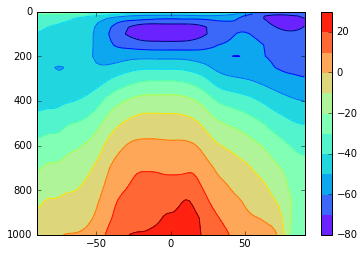

In [6]:
ncf = netCDF4.Dataset("data/air.mon.ltm.nc", "r")
level_data = ncf.variables["level"][:]
lat_data = ncf.variables["lat"][:]

# Extract data for month_index 0, all levels, all lats, lon_index 0
temp_data = ncf.variables["air"][0,:,:,0]
temp_data.shape

plt.contourf(lat_data, level_data, temp_data, 10, cmap=plt.cm.rainbow)
plt.ylim(1000, 0)
plt.colorbar()

plt.contour(lat_data, level_data, temp_data, 10)

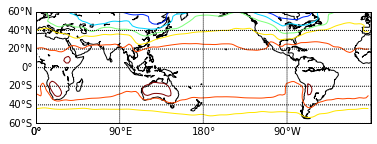

In [7]:
import mpl_toolkits.basemap as bm

ncf = netCDF4.Dataset("data/air.mon.ltm.nc", "r")
lon = ncf.variables["lon"][:]
lat = ncf.variables["lat"][:]
temp_data = ncf.variables["air"][0,0,:,:]


mapproj = bm.Basemap(projection='cyl',
                     llcrnrlat=-60.0, llcrnrlon=0.0,
                     urcrnrlat=60.0, urcrnrlon=360.0)
mapproj.drawcoastlines()
mapproj.drawparallels(np.array([-60, -40, -20, 0, 20, 40, 60]), labels=[1,0,0,0])
mapproj.drawmeridians(np.array([-180, -90, 0, 90, 180]), labels=[0,0,0,1])

lonall, latall = np.meshgrid(lon, lat)
lonproj, latproj = mapproj(lonall, latall)
plt.contour(lonproj, latproj, temp_data)

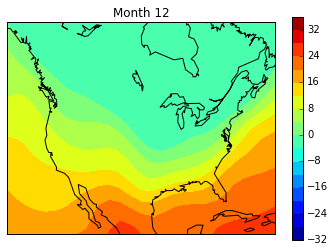

In [8]:
def us_plot(month):

    ncf = netCDF4.Dataset("data/air.mon.ltm.nc", "r")
    lon = ncf.variables["lon"][:]
    lat = ncf.variables["lat"][:]
    temp_data = ncf.variables["air"][month-1,0,:,:]

    mapproj = bm.Basemap(projection='lcc', lat_0=30, lon_0=250,
                     llcrnrlat=20.0, llcrnrlon=230,
                     urcrnrlat=55.0, urcrnrlon=310)
    mapproj.drawcoastlines()
    lonall, latall = np.meshgrid(lon, lat)
    lonproj, latproj = mapproj(lonall, latall)
    plt.contourf(lonproj, latproj, temp_data, 20)
    plt.colorbar()
    plt.title("Month "+str(month))

us_plot(12)

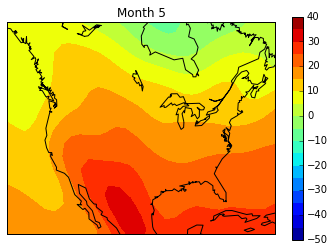

In [9]:
us_plot(5)

Documentación oficial de netcdf4-python:

https://unidata.github.io/netcdf4-python/

Galeria de ejemplos de basemaps:

http://matplotlib.org/basemap/users/examples.html

## netCDF y OpenDAP

Para abrir un archivo netCDF mediante OpenDAP, simplemente le ponemos el url.

In [10]:
# Read data from an opendap server
import netCDF4
# specify an url, the JARKUS dataset in this case
url = 'http://dtvirt5.deltares.nl:8080/thredds/dodsC/opendap/rijkswaterstaat/jarkus/profiles/transect.nc'
# create a dataset object
dataset = netCDF4.Dataset(url)
 
# lookup a variable
variable = dataset.variables['id']
# print the first 10 values
print(variable[0:10])

[2000100 2000101 2000102 2000103 2000104 2000105 2000106 2000120 2000140
 2000160]


## Lectura de multiples archivos

netCDF me permite abrir multiples archivos haciendo uso de expresiones regulares

In [ ]:
from netCDF4 import MFDataset

# Abrea multiples archivos netCDF
nc = MFDataset('data/wind_195*.nc')

In [11]:
#Este css es trabajo de @LorenaABarba y su grupo
from IPython.core.display import HTML
css_file = '../css/personal.css'
HTML(open(css_file, "r").read())